本篇通过图像显示一个函数的泰勒级数逼近与原函数的对比，目的在于更好地理解泰勒级数和matplotlib的用法。

$f(x)=f(x_0)+\frac{f'(x_0)}{1!}(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2+\frac{f'''(x_0)}{3!}(x-x_0)^3+.. +\frac{f^(n)(x_0)}{n!}(x-x_0)^n$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

$e^x=x+\frac{x}{1!}+\frac{x^2}{2!}+\frac{x^3}{3!}...+\frac{x^n}{n!}$

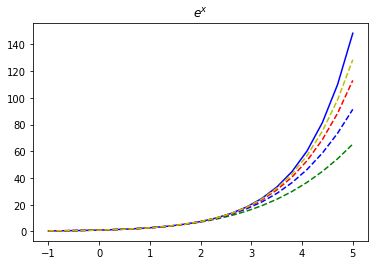

In [2]:
x=np.linspace(-1,5,21)
plt.plot(x,np.e**x, 'b-')
plt.plot(x,1+x+(x**2)/2+(x**3)/(3*2)+(x**4)/(4*3*2),'g--') #n=4
plt.plot(x,1+x+(x**2)/2+(x**3)/(3*2)+(x**4)/(4*3*2)+(x**5)/(5*4*3*2),'b--') #n=5
plt.plot(x,1+x+(x**2)/2+(x**3)/(3*2)+(x**4)/(4*3*2)+(x**5)/(5*4*3*2)+(x**6)/(6*5*4*3*2),'r--') #n=6
plt.plot(x,1+x+(x**2)/2+(x**3)/(3*2)+(x**4)/(4*3*2)+(x**5)/(5*4*3*2)+(x**6)/(6*5*4*3*2)+(x**7)/(7*6*5*4*3*2),'y--') #n=6
plt.title("$e^x$")
plt.show()

在上一单元，我们使用了5次plt.plot()，将5条函数曲线画在同一张图上（实际上是在同一个Figure对象），同一个框里（实际上在同一个Axes里）。下面我们看看另一种可能。

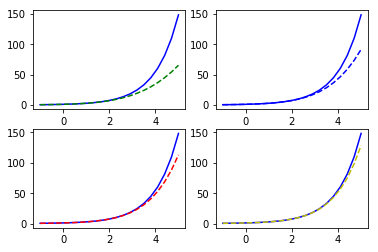

In [7]:
x=np.linspace(-1,5,21)

fig1=plt.figure()

ax1 = fig1.add_subplot(2,2,1) #fig1被划分为2X2，共4块，其中第1块是ax1.
ax1.plot(x,np.e**x, 'b-') #
ax1.plot(x,1+x+(x**2)/2+(x**3)/(3*2)+(x**4)/(4*3*2),'g--') #n=4

ax2 = fig1.add_subplot(2,2,2)
ax2.plot(x,np.e**x, 'b-') #
ax2.plot(x,1+x+(x**2)/2+(x**3)/(3*2)+(x**4)/(4*3*2)+(x**5)/(5*4*3*2),'b--') #n=5

ax3 = fig1.add_subplot(2,2,3)
ax3.plot(x,np.e**x,'b-')
ax3.plot(x,1+x+(x**2)/2+(x**3)/(3*2)+(x**4)/(4*3*2)+(x**5)/(5*4*3*2)+(x**6)/(6*5*4*3*2),'r--') #n=6

ax4 = fig1.add_subplot(2,2,4)
ax4.plot(x,np.e**x,'b-')
ax4.plot(x,1+x+(x**2)/2+(x**3)/(3*2)+(x**4)/(4*3*2)+(x**5)/(5*4*3*2)+(x**6)/(6*5*4*3*2)+(x**7)/(7*6*5*4*3*2),'y--') #n=7

plt.show()

**要点**：
- fig1 = plt.figure()，返回的是一个.figure.Figure对象。组成图像的其他对象都是放到这个对象中的，这个对象就好比一张画纸。可已给figure()传递参数figsize，其值为元组，我们将在下一例中看到。
- ax1 = fig1.add_subplot(2,2,1)，返回的是一个.axes._subplots.AxesSubplot对象。前两个参数表示将fig1划为4块（2x2），第3个参数，表示此块(ax1)是4块中的第1块。
- ax1.plot(),表示在ax1上画图。

$\sin(x)=x-\frac{x^3}{3!}+\frac{x^5}{5!}- ... +(-1^{m-1})\frac{x^{2m-1}}{(2m-1)!}$

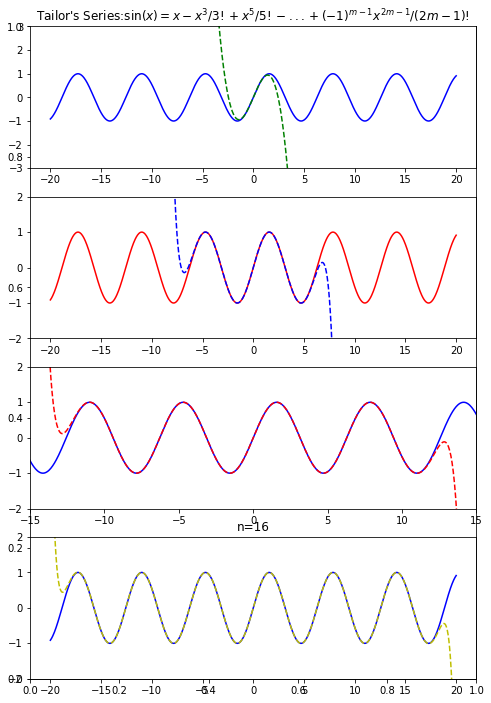

In [22]:
def sinx_ts(x,m):               #n=2m
    if m==1:
        return x
    else:
        return ((-1)**(m-1))*(x**(2*m-1))/math.factorial(2*m-1)+sinx_ts(x,m-1)

x=np.linspace(-20,20,1001)

fig2=plt.figure(figsize=(8,12))

plt.title("Tailor's Series:$\sin(x)=x-x^3/3!+x^5/5!- ... +(-1)^{m-1}x^{2m-1}/(2m-1)!$") #设置图像标题

ax5 = fig2.add_subplot(411)
ax5.plot(x,np.sin(x), 'b-')
ax5.plot(x,sinx_ts(x,2),'g--',label='n=4') #m=2,n=2*m=4
plt.ylim(-3,3) #设置y坐标显示范围

ax6 = fig2.add_subplot(4,1,2)
ax6.plot(x,np.sin(x),'r-')
ax6.plot(x,sinx_ts(x,8),'b--') #n=8
plt.ylim(-2,2) #设置y坐标显示范围

ax7 = fig2.add_subplot(4,1,3)
ax7.plot(x,np.sin(x),'b-')
ax7.plot(x,sinx_ts(x,16),'r--') #n=12
plt.ylim(-2,2) #设置y坐标显示范围
plt.xlim(-15,15) #设置x坐标显示范围

ax8 = fig2.add_subplot(4,1,4)
ax8.plot(x,np.sin(x),'b-')
ax8.plot(x,sinx_ts(x,24),'y--') #n=16
plt.ylim(-2,2) #设置y坐标显示范围
ax8.set_title('n=16')

plt.show()

**要点**：
- sinx_ts(x,m)，此函数用于计算$\sin(x)$的泰勒级数的值，需要参数x和m，注意函数的级数n=2m。用了递归的方法。
- fig2 = plt.figure(figsize=(8,16))，给figure()传递参数figsize，其值为元组。
- ax5 = fig2.add_subplot(411),add_subplot(411)等同于add_subplot(4,1,1)
- plt.ylim(-2,2)，设置y坐标的显示范围，对比第1图和第2图。对x坐标也有相似的命令，plt.xlim(-10,10)，对比第2图和第3图。
- ax8.set_title('n=16')，通过此方法，可以分别为每个AxesSubplot设置标题。

在上文中，我们把figure对象比作1张空白纸，可以将其分为多个部分，可分别在各个部分上画图，那么我们可不可以在这张空白纸上的任意位置开始画图呢？答案当然是可以的。且看下一列。

$\arctan(x)=x-\frac{x^3}{3}+\frac{x^5}{5}-\frac{x^7}{7}+...+(-1)^{n-1}\frac{x^{2n-1}}{2n-1}$

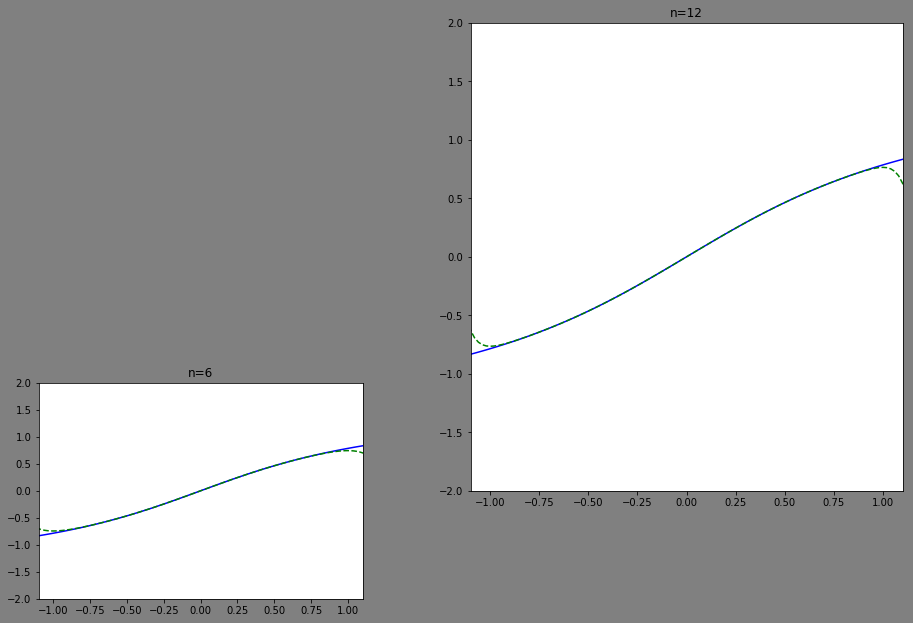

In [77]:
def arctanx_ts(x,n):               
    if n==1:
        return x
    else:
        return ((-1)**(n-1))*(x**(2*n-1))/(2*n-1)+arctanx_ts(x,n-1)

z = np.linspace(-10,10,1001)

fig3=plt.figure(figsize=(15,10),facecolor='gray')

ax9 = fig3.add_axes([0.1,0.1,0.3,0.3])
ax9.plot(z,np.arctan(z), 'b-') #
ax9.plot(z,arctanx_ts(z,6),'g--')
plt.ylim((-2,2))
plt.xlim((-1.1,1.1))
ax9.set_title("n=6")

ax10 = fig3.add_axes([0.5,0.25,0.4,0.65])
ax10.plot(z,np.arctan(z), 'b-') #
ax10.plot(z,arctanx_ts(z,12),'g--')
plt.ylim((-2,2))
plt.xlim((-1.1,1.1))
ax10.set_title("n=12")

plt.show()

**要点**：

- figure()中的参数facecolor表示Figure对象的背景颜色。
- ax9 = fig3.add_axes([0.1,0.1,0.3,0.3])，返回Axes对象，也就是在空白纸中劈出一个区域。列表中的4个数字分别表示左角点、下角点、宽度、高度，位置是相对于的Figure对象的，假设对象的尺寸是1X1.